Run in dataset_gen: 

```df.to_csv('C:/Users/sunnivas/OneDrive - Norwegian University of Life Sciences/Documents/code/cubiai/sunniva/multiclass_complete')``` 

and 

```pd.DataFrame(folds).to_csv('C:/Users/sunnivas/OneDrive - Norwegian University of Life Sciences/Documents/code/cubiai/sunniva/multiclass_diagnosis_folds')``` 

Fasit for multiclass complete:

1 1, artrose 497

2 1, sklerose 99

3 2, artrose 259

4 2, primaerlesjon 93

5 3, artrose 111

6 3, MCD 165

7 3, OCD 20

8 3, UAP 17

In [38]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='paper',palette=sns.color_palette("tab10"),style='white',font_scale=1.5,font='serif')

In [39]:
def image_extraction(filename:str) -> tuple[np.array, pd.DataFrame]:
    """Extract images aswell as the foldless dataset. The indeces will match between ds and image array, but not ID."""
    dataset = h5py.File(filename, 'r')
    ds = pd.DataFrame()
    for i, fold in enumerate(dataset.keys()):
        df=pd.DataFrame({'ID':np.array(dataset[fold]['patient_idx']),'target':np.array(dataset[fold]['y']),'diagnosis':np.array(dataset[fold]['diagnosis']),'fold':i})
        ds=pd.concat([ds,df],ignore_index=True,axis=0,keys=['','fold {}'.format(fold)]) # ignore index to match index with image indeces

    images=np.array(dataset['fold_0']['x'])
    images = np.append(images,np.array(dataset['fold_1']['x']),axis=0)
    images=np.append(images,np.array(dataset['fold_2']['x']),axis=0)
    images=np.append(images,np.array(dataset['fold_3']['x']),axis=0)
    images=images.reshape(len(images),800,800)
    dataset.close()
    return images, ds


def fold_percentages(ds: list):
    "Use the fold_extraction function to get the folds. This prints the distribution of diagnoses in each fold."

    diagnoses=['normal','1, artrose/\nsklerose','2, artrose', '2, MCD',
               '3, artrose', '3, MCD', '3, OCD', '3, UAP']
    plt.figure()
    plot=sns.countplot(x='diagnosis',data=ds, hue='fold')

    i=0
    lst = []
    for k in range(4):
        fold = ds[ds.fold == k]
        dct={}
        for j,diagnosis in enumerate(diagnoses):
            dct[diagnosis] = sum(fold['diagnosis']==j)
        
        lst.append(dct)
        i+=1
    plt.title('Fordeling av antall prøver i hver fold')
    plt.xticks([0,1,2,3,4,5,6,7],diagnoses,rotation=45)
    plt.legend(['fold 0','fold 1','fold 2','fold 3'],loc='upper right')
    #plt.ylim(top=1900)
    #plot.bar_label(plot.containers[0])
    plt.show()
    
    return lst


In [40]:
path = '//nmbu.no/Research/Project/CubiAI/preprocess/datasets/800_normal_abnormal_2.h5' # 800_complete_ext_binary_2 / 800_normal_abnormal_2
im, ds = image_extraction(path)


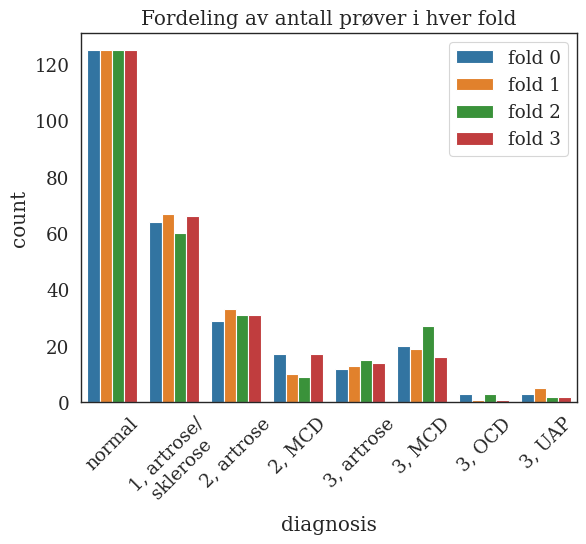

In [41]:
l=fold_percentages(ds)

In [29]:
l

[{'normal': 444,
  '1, artrose/\nsklerose': 186,
  '2, artrose': 98,
  '2, MCD': 46,
  '3, artrose': 46,
  '3, MCD': 50,
  '3, OCD': 3,
  '3, UAP': 9},
 {'normal': 443,
  '1, artrose/\nsklerose': 193,
  '2, artrose': 90,
  '2, MCD': 38,
  '3, artrose': 46,
  '3, MCD': 64,
  '3, OCD': 0,
  '3, UAP': 8},
 {'normal': 443,
  '1, artrose/\nsklerose': 184,
  '2, artrose': 93,
  '2, MCD': 46,
  '3, artrose': 33,
  '3, MCD': 68,
  '3, OCD': 2,
  '3, UAP': 13},
 {'normal': 443,
  '1, artrose/\nsklerose': 207,
  '2, artrose': 90,
  '2, MCD': 29,
  '3, artrose': 37,
  '3, MCD': 66,
  '3, OCD': 3,
  '3, UAP': 6}]